# Introduction

Flood dataset consist of annual rainfall index of KARELA india, The town is prone to to flood due to the follow reasons:
Heavy rainfall, Over population, Deforestation, Changing the flows of river and so on.

# Questions

Which of the month influenced the flooding??

What is the highest value of annual rainfall index?

What is the lowest value of annual rainfall index?

Was there flood when we have the minimum value for annual rainfall index?

Was there flood when we have the maximum value for annual rainfall index?

There are many questions to be asked base on different angle at which the data is been look into

# Lets get started

Import all the liberaries to be used

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb
from sklearn.linear_model import LogisticRegression

load the dateset

In [5]:
fd = pd.read_csv('C:/Users/user/Desktop/new 1/data science/kerala.csv')

display the dimension of the dataset

In [6]:
fd.shape

(118, 16)

The dateset consist of 118 Rows with 16 Columns

Lets check the  data information to identify the cleaning and tidyness issue

In [7]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

The data types are in order except FLOODS column that will need to be change to boolen

Check if there is null value

In [9]:
fd.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

No null value in the dataset

Lets get the summary of the data

In [12]:
fd.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


we have the highest annual rain fall index to be 4473 and it floods why the lowest is 2068 and no flood with mean of 2934

Rename the ANNUAL RAIN FALL 

In [13]:
#RENAME THE COLUMN
fd.rename(columns ={' ANNUAL RAINFALL': 'ANNUAL_RAINFALL'}, inplace = True)

### EXPLORATORY ANALYSIS

Get the first 10 with smallest Rainfall with their flood state

In [14]:
fns =fd.nsmallest(10, 'ANNUAL_RAINFALL')
fns.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_RAINFALL,FLOODS
75,KERALA,1976,0.1,1.5,21.0,134.5,75.8,196.8,641.5,342.6,116.2,221.3,286.7,30.8,2068.8,NO
85,KERALA,1986,5.6,18.7,11.2,63.1,126.7,597.9,324.8,340.3,235.4,165.5,194.7,9.5,2093.2,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
86,KERALA,1987,0.6,0.8,4.3,57.2,108.3,572.6,221.0,396.6,157.0,272.1,216.0,131.1,2137.6,NO
111,KERALA,2012,7.4,11.0,21.0,171.1,95.3,430.3,362.6,501.6,241.1,187.5,112.9,9.4,2151.1,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
81,KERALA,1982,0.7,0.1,21.9,60.4,148.2,612.2,511.5,495.0,70.6,164.4,127.5,10.8,2223.3,NO
82,KERALA,1983,0.2,1.5,0.9,13.1,76.0,322.8,583.2,579.9,421.1,136.2,116.5,69.1,2320.3,NO
51,KERALA,1952,5.2,48.2,20.8,112.2,214.6,576.7,430.0,413.6,57.4,339.6,49.6,66.9,2334.8,NO
64,KERALA,1965,9.1,0.9,28.3,109.8,214.5,597.7,465.1,296.1,150.1,183.7,131.7,155.5,2342.4,NO


you can see the years with the lowest rain fall index and no flood in these years

Lets plot a line graph for Year and Annual flood

Text(0.5, 1.0, 'LOWEST ANNUAL RAIN FALL INDEX GRAPH')

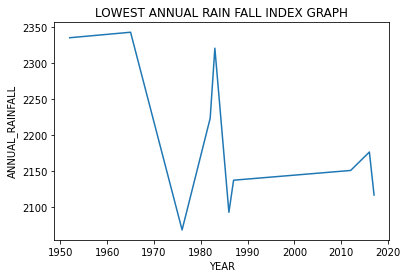

In [15]:
#fns.head(10)
snb.lineplot(data = fns, y = 'ANNUAL_RAINFALL', x = 'YEAR')
plt.title('LOWEST ANNUAL RAIN FALL INDEX GRAPH')

A line graph that shows the trend of lowest rain fall

In [97]:
#snb.countplot(data = fd, x = 'FLOODS')
fnl = fd.nlargest(10, 'ANNUAL_RAINFALL')
fnl

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_RAINFALL,FLOODS
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,1
60,KERALA,1961,13.7,31.3,11.4,94.1,500.5,1005.2,1146.5,678.3,399.3,274.2,85.9,17.5,4257.8,1
23,KERALA,1924,19.3,2.9,66.6,111.0,185.4,1011.7,1526.5,624.0,289.1,176.5,162.9,50.4,4226.4,1
32,KERALA,1933,1.0,9.3,36.9,139.5,738.8,859.3,773.4,479.5,469.7,397.0,126.1,42.3,4072.9,1
58,KERALA,1959,3.0,21.4,6.3,150.7,347.2,872.8,1155.7,397.3,405.5,200.4,151.9,34.0,3746.0,1
6,KERALA,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1,1
45,KERALA,1946,1.8,5.4,108.4,139.8,83.0,919.0,671.7,695.6,199.4,266.1,273.0,202.3,3565.5,1
74,KERALA,1975,5.2,21.4,63.4,123.8,162.2,864.4,531.3,675.9,457.7,368.9,204.3,19.9,3498.4,1
106,KERALA,2007,0.5,5.6,7.3,138.5,192.7,705.9,966.3,489.6,526.7,357.2,87.4,11.9,3489.6,1
22,KERALA,1923,24.7,0.7,78.9,43.5,80.0,722.5,1008.7,943.0,254.3,203.1,83.9,41.6,3484.7,1


you can see the years with the highest rain fall index and and it flood in these years

Text(0.5, 1.0, 'HIGHEST ANNUAL RAIN FALL INDEX GRAPH')

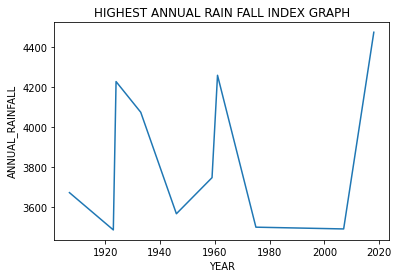

In [18]:
snb.lineplot(data = fnl, y = 'ANNUAL_RAINFALL', x = 'YEAR') 
plt.title('HIGHEST ANNUAL RAIN FALL INDEX GRAPH')
#pd.crosstab(fd['YEAR'], fd['MAY'])

A line graph that shows the trend of highest rain fall

Text(0.5, 1.0, 'FLOOD CLASSIFICATION GRAPH')

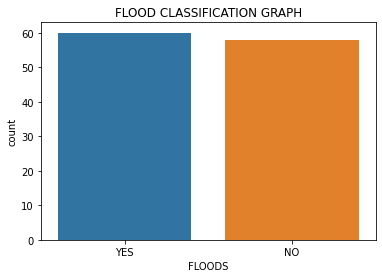

In [20]:
snb.countplot(data = fd, x = 'FLOODS')
plt.title('FLOOD CLASSIFICATION GRAPH')

You can see, the prediction class is balance

Lets plot a graph of raining season and dry season check the trend of the rain fall

#### NOTE:

RAINING SEASON TAKES LEFT HAND SIDE WHILE RIGHT HAND SIDE TAKES THE DRY SEASON FOR EASY UNDERSTANDING

In [22]:
rain_season = fd[['APR','JAN','MAY', 'FEB', 'JUN','MAR']]
dry_season = fd[['JUL','OCT', 'AUG', 'SEP', 'NOV','DEC']]

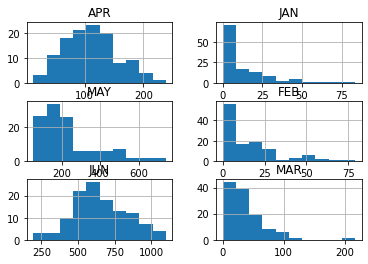

In [25]:
#for i in rain_season:
rain_season.hist()
#plt.title('RAINING SEASON VS DRY SEASON')
plt.show()

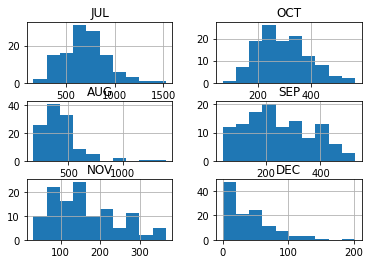

In [24]:
dry_season.hist()
#plt.title('RAINING SEASON VS DRY SEASON')
plt.show()

This graphs show that it rains more in RAINING SEASON MONTH AND SUPRISINGLY IT RAINS WELL IN SEPTEMBER, OCTOBER NOVEMBER & DECEMBER

Delete SUBDIVISION COLUMN

In [16]:
fd = fd.drop(['SUBDIVISION', 'YEAR'], axis = 1)

Lets look in to the data summary again

In [26]:
fd.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


we have the highest annual rain fall to be 4473 and it floods why the lowest is 2068 and no flood with mean of 2934

Change the YES to 1 and No to 0 

In [27]:
fd['FLOODS'] = fd['FLOODS'].apply(lambda x: 1 if x == 'YES' else 0)

Lets check it out

In [34]:
fd.head(1)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1


define the features and label

In [35]:
flood_features = ['JAN','FEB','MAR', 'APR','MAY', 'JUN', 'JUL','AUG','SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL_RAINFALL']
flood_label = 'FLOODS'

Get the values of  of the features

Code

In [36]:
X, y = fd[flood_features].values, fd[flood_label].values

Displaying the dataset label with thier  features

In [37]:
for n in range(0,5):
    print('Flood',str(n+1), '\n: Flood Features', list(X[n]), '\n: Label', y[n])

Flood 1 
: Flood Features [28.7, 44.7, 51.6, 160.0, 174.7, 824.6, 743.0, 357.5, 197.7, 266.9, 350.8, 48.4, 3248.6] 
: Label 1
Flood 2 
: Flood Features [6.7, 2.6, 57.3, 83.9, 134.5, 390.9, 1205.0, 315.8, 491.6, 358.4, 158.3, 121.5, 3326.6] 
: Label 1
Flood 3 
: Flood Features [3.2, 18.6, 3.1, 83.6, 249.7, 558.6, 1022.5, 420.2, 341.8, 354.1, 157.0, 59.0, 3271.2] 
: Label 1
Flood 4 
: Flood Features [23.7, 3.0, 32.2, 71.5, 235.7, 1098.2, 725.5, 351.8, 222.7, 328.1, 33.9, 3.3, 3129.7] 
: Label 1
Flood 5 
: Flood Features [1.2, 22.3, 9.4, 105.9, 263.3, 850.2, 520.5, 293.6, 217.2, 383.5, 74.4, 0.2, 2741.6] 
: Label 0


Split the dataset into 2, 70% to train & 30% to test

Code

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.30, random_state = 0)

Lets Check the sum of the training & testing dataset

In [39]:
print(X_train.shape[0], X_test.shape[0])

82 36


It is important to set a regularization parameter.
this is used to counter any bias in the sample and help model to generalise well by avoiding overfitting the model to the training data.

set the regularization rate to 0.01 & define the Algorithm to be used (LogisticRegression), then print the model

In [40]:
reg = 0.01
model = LogisticRegression(C = 1/reg,  solver = 'liblinear').fit(X_train,y_train)
print(model)

LogisticRegression(C=100.0, solver='liblinear')


evaluate the model using the test dataset & compare the predicted labels to known label

In [41]:
prediction = model.predict(X_test)
print('PREDICTIONS', prediction)
print('ACTUAL     ',y_test)

PREDICTIONS [0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0]
ACTUAL      [0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0]


Out of 36 rows that was used for the test, its only predicted 3 wrongly which is still very owkay

# Metrics & Evaluation

### 1- Accuracy

In [43]:
#importing metrics library
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve
ac_score = accuracy_score(prediction, y_test)*100
print(ac_score)

91.66666666666666


We have 91% accuracy which is better, Accurance is a good metric used in classification, however it works well if the classififcation is balance but it can be misleading if otherwise

### Recall & Precision

Precision: Of all the predictions the model made for the class, how many were correct

Recall: Out of all the instances of this class on the test dataset, how many proportion did the model identify

In [45]:
recal = recall_score(y_test,prediction)*100
precision = precision_score(y_test,prediction)*100
print('PRECISION:',precision)
print('RECALL:   ',recal)


PRECISION: 83.33333333333334
RECALL:    100.0


83% of the model predictions were correct
and the model was able to identify 100% proportion

## Classification Report Summary

In [283]:
classi = classification_report(y_test, prediction)
print(classi)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.83      1.00      0.91        15

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36



Precision: Of all Years the model pridicted flood, how many were actually flood?

Recall: Out of all years it flood, how many proportion did the model identify

F1-Score: An average metric that takes both precision and recall into account

Support:How many instances of this class are there in the test dataset

The classification report also includes averages for these metrics, including a wighted average that allows for the imbalance in the number of cases of each class

## Confussion Matrix

True Positives: The predicted label 1 and the actual are both 1

False Positives: The predicted label is 1, but the actual label is 0

False Negatives: The predicted label is 0 and the actual is 1

False Positives: The predicted label is 0 and the actual is 0

TN	FP

FN	TP

The correct true predictions from diagonal line from top to left to bottom right, the figure should be significantly higher than the false predictions if the model is good

In [48]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[18  3]
 [ 0 15]]


The confusion matrix shows that 18 & 15 out 36 testing dataset was classified correctly while 3 was classified wrongly 
which shows our Model perform better


Untill now, we've considered the predictions from the model as being eithe 1 or 0 class labels.
Actually, things are a little complex than that. Statistical machine learning algorithms, like logistic regression,
are based on probability;
So what actually gets predicted by binary classifier is probability that the label is true(P(y)) and 
the probability that the label is false (1-P(y)). A threshold value of 0.5 is used to decide
whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y <= 0.5))
You can use the predict_proba to see the probility pairs for each case

In [50]:
#You can use the predict_proba method to see the probability pairs for each case:
y_score = model.predict_proba(X_test)
print(y_score)

[[9.96901717e-01 3.09828282e-03]
 [9.98685297e-01 1.31470266e-03]
 [4.71732774e-01 5.28267226e-01]
 [3.96463131e-02 9.60353687e-01]
 [8.93045994e-01 1.06954006e-01]
 [2.23728454e-04 9.99776272e-01]
 [9.35323692e-01 6.46763077e-02]
 [5.04718753e-01 4.95281247e-01]
 [8.62132428e-05 9.99913787e-01]
 [8.47932904e-01 1.52067096e-01]
 [9.67791260e-01 3.22087399e-02]
 [1.29324851e-01 8.70675149e-01]
 [2.70989609e-02 9.72901039e-01]
 [9.99331263e-01 6.68736544e-04]
 [2.10664872e-07 9.99999789e-01]
 [7.28135763e-01 2.71864237e-01]
 [4.72147373e-03 9.95278526e-01]
 [9.75286425e-01 2.47135754e-02]
 [9.33544647e-01 6.64553530e-02]
 [9.99830146e-01 1.69853671e-04]
 [9.21255086e-01 7.87449142e-02]
 [9.99463270e-01 5.36730224e-04]
 [5.86430083e-01 4.13569917e-01]
 [7.52170046e-02 9.24782995e-01]
 [8.13210953e-02 9.18678905e-01]
 [2.92780029e-01 7.07219971e-01]
 [4.83944996e-01 5.16055004e-01]
 [8.63592406e-01 1.36407594e-01]
 [8.99077401e-02 9.10092260e-01]
 [2.36084404e-01 7.63915596e-01]
 [7.231338

The decision to score a prediction as 1 or 0 depends on the threshold to which the predicted probabilities are compared,
If we were to change the threshold, it wouls affect the predictions; and therefore change the metrics in confusion matrix.
A common way to evaluate a classifier is to exsmine the true positive rate (which is another name for recall) and a false positive rate for a range of possible thresholds.
These rates are then plotted against all possible thresholds to form a chart knon as a recieved operator characteristic (ROC) chart. like this

In [51]:
roc_curve
fpr, tpr , threshold = roc_curve(y_test, y_score[:,1])

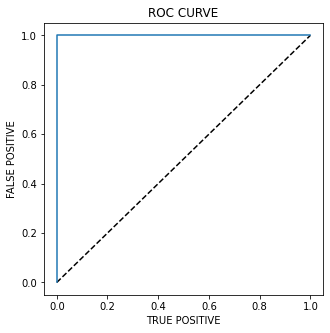

In [53]:
fig = plt.figure(figsize = (5,5))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.ylabel('FALSE POSITIVE')
plt.xlabel('TRUE POSITIVE')
plt.title('ROC CURVE')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 & 1
A perfect classifier would have a curve that goes strsinght up the left aside and straight accrost the top.
The diagonal line across the chart represents the probability of predicting correctly with 50/50 random prediction;
so you obviously want the curve to be higher than that instead your model is no better than simply guessing

The area under the curve (AUC) is value between 0 & 1 that quantifies the overall performsnce of the model.
The closer to 1 this value is, the better the model.

In [54]:
roc = roc_auc_score(y_test, y_score[:,1])
print(roc)

1.0


In [ ]:
In this case, The ROC and its AUC indicates that the model performs better than a random guess which is not bad considering we performed little preprocessing


# Preprocessing

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. 
There's a huge range of preprocessing transformations you can perform to get your data ready for modeling,
but we'll limit ourselves to a few common techniques:


### Scalling

Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.

### Encoding

Encoding categorical variables. For example, by using a one hot encoding technique you can create individual binary (true/false) features for 
each possible category value.


To apply these preprocessing transformations, we'll make use of a Scikit-Learn feature named pipelines. 
These enable us to define a set of preprocessing steps that end with an algorithm. 
You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. 
This is useful, because when we want to use the model to predict values from new data,
we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

Define preprocessing for numeric columns (scale them)

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = [0,1,2,3,4,5,6,7,8,9,10,11,12]
feature_transformer= Pipeline (steps = [
    ('scaler', StandardScaler())])

create preprocessing steps

In [56]:
preprocessor = ColumnTransformer(
    transformers =[
        ('preprocess', feature_transformer, numeric_features)
    ])

 Create preprocessing and training pipeline

In [57]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('loggressor',LogisticRegression(C=1/reg, solver ='liblinear'))
])

fit the pipeline to train a logistic regression model on the training set

In [58]:
model = pipeline.fit(X_train,y_train)

OK, the model is trained, including the preprocessing steps. Let's see how it performs with the validation data.

Let's use the model trained by this pipeline to predict labels for our test set, 
and compare the performance metrics with the basic model we created previously.

In [62]:
prediction = model.predict(X_test)
print('PREDICTIONS',prediction)
print('ACTUAL     ',y_test)

PREDICTIONS [0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0]
ACTUAL      [0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0]


Check out predictions

# METRICS

In [63]:
acL = accuracy_score(prediction, y_test)*100
prec = precision_score(prediction, y_test)*100
classi = classification_report(prediction,  y_test)
roc = roc_auc_score(prediction, y_test)
cm = confusion_matrix(y_test, prediction)
print(acL)
print(prec)
print(classi)
print(roc)
print(cm)

94.44444444444444
100.0
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.88      0.94        17

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36

0.9411764705882353
[[19  2]
 [ 0 15]]


In [65]:
y_score = model.predict_proba(X_test)
print(y_score)

[[1.00000000e+00 8.20344583e-15]
 [1.00000000e+00 1.66360467e-16]
 [6.71810514e-01 3.28189486e-01]
 [2.90138598e-04 9.99709861e-01]
 [9.99933249e-01 6.67507926e-05]
 [0.00000000e+00 1.00000000e+00]
 [9.99998380e-01 1.61957613e-06]
 [9.99702864e-01 2.97136492e-04]
 [0.00000000e+00 1.00000000e+00]
 [9.99994124e-01 5.87559825e-06]
 [9.99999994e-01 6.29693311e-09]
 [3.58022139e-03 9.96419779e-01]
 [9.10603563e-08 9.99999909e-01]
 [1.00000000e+00 2.14308531e-14]
 [0.00000000e+00 1.00000000e+00]
 [9.89138513e-01 1.08614869e-02]
 [1.39444012e-13 1.00000000e+00]
 [9.99999999e-01 5.42452116e-10]
 [9.99999997e-01 2.72939453e-09]
 [1.00000000e+00 1.47373426e-17]
 [9.99974847e-01 2.51529215e-05]
 [1.00000000e+00 5.88064165e-14]
 [9.99949720e-01 5.02796592e-05]
 [3.73816657e-05 9.99962618e-01]
 [1.42662358e-05 9.99985734e-01]
 [2.85185830e-01 7.14814170e-01]
 [2.46387660e-01 7.53612340e-01]
 [9.99966512e-01 3.34882559e-05]
 [2.15622790e-02 9.78437721e-01]
 [5.13062122e-05 9.99948694e-01]
 [9.999757

In [66]:
roc_curve
fpr, tpr , threshold = roc_curve(y_test, y_score[:,1])

 Plot predicted vs actual

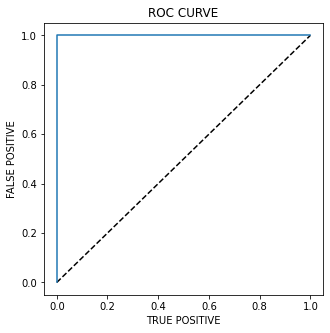

In [68]:
fig = plt.figure(figsize = (5,5))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.ylabel('FALSE POSITIVE')
plt.xlabel('TRUE POSITIVE')
plt.title('ROC CURVE')
plt.show()

In [294]:
roc = roc_auc_score(y_test, y_score[:,1])
print(roc)

1.0


The results look a little better, so clearly preprocessing the data has made a difference.

The pipeline is composed of the transformations and the algorithm used to train the model. 
To try an alternative algorithm you can just change that step to a different kind of estimator.

This time, We'll use the same preprocessing steps as before, but we'll train the model using named 
Random Forest that combines the outputs of multiple random decision trees

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('loggressor',RandomForestClassifier(n_estimators = 100))
])

fit the pipeline to train a Random Forest model on the training set

In [71]:
model = pipeline.fit(X_train,y_train)

Get predictions

In [72]:
prediction = model.predict(X_test)
print('PREDICTIONS',prediction)
print('ACTUAL     ',y_test)

PREDICTIONS [0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0]
ACTUAL      [0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0]


Display metrics

In [299]:
acR = accuracy_score(prediction, y_test)*100
prec = precision_score(prediction, y_test)
classi = classification_report(prediction,  y_test)
roc = roc_auc_score(prediction, y_test)
cm = confusion_matrix(y_test, prediction)
print(acR)
print(prec)
print(classi)
print(roc)
print(cm)

100.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        15

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

1.0
[[21  0]
 [ 0 15]]


In [74]:
y_score = model.predict_proba(X_test)
#print(y_score)

In [75]:
roc_curve
fpr, tpr , threshold = roc_curve(y_test, y_score[:,1])

Plot predicted vs actual

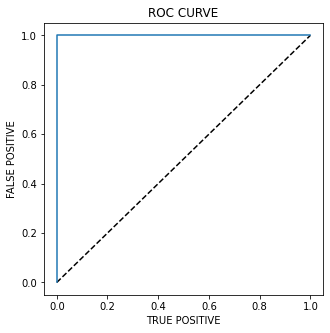

In [76]:
fig = plt.figure(figsize = (5,5))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.ylabel('FALSE POSITIVE')
plt.xlabel('TRUE POSITIVE')
plt.title('ROC CURVE')
plt.show()

In [77]:
auc = roc_auc_score(y_test, y_score[:,1])
print(auc)

1.0


That looks better!

Use the Model for Inferencing

Now that we have a reasonably useful trained model, we can save it for use later to predict labels for new data:

In [ ]:
import joblib
# Save the model as a pickle file
filename = 'C:/Users/user/Desktop/new 1/data science/floods.pkl'
joblib.dump(model, filename)

# CONCLUSSION

It has been a good analysis looking from the angle of the features that influence the predictions
It was however noted that the any annual rainfall index that is lower than 2934 will not flood that year 
but anything above that will flood
However,It is worthy to be noted of July, August, September and October rainfall index as they are the major influence for flood to occur
Therefore, the environmental management should highly priotize the said month and in other to prepare against the flood and lost of life and properties
The preprocessing also improves our model performance as well which shows its own influence too
More analyses and insight can as well be discovered as data insight does not have limitation

# Limitation

This might not be generally accepted due to different weather condition of some locations